### Placement Testing

Check locations, direction, label placement, rotate/flip, etc.

In [1]:
import schemdraw
from schemdraw import elements as elm
from schemdraw import logic as l
from schemdraw.util import Point
schemdraw.use('svg')

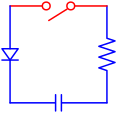

In [2]:
# Test directions. Should form square. Blue as default color.
d = schemdraw.Drawing(color='blue', lw=1.5)
d.add(elm.Capacitor().right())
d.add(elm.Resistor().up())
d.add(elm.Switch().left().color('red'))
d.add(elm.Diode().down())
d.draw()

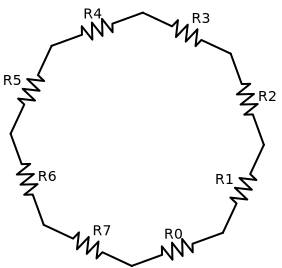

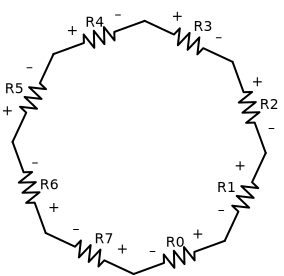

In [3]:
# Test label positioning & rotations/theta
d = schemdraw.Drawing()
for i in range(8):
    d.add(elm.Resistor().theta(45*i+20).label('R%d'%i))
display(d.draw())

d = schemdraw.Drawing()
for i in range(8):
    d.add(elm.Resistor().theta(45*i+20).label(('–','R%d'%i,'+')))
display(d.draw())


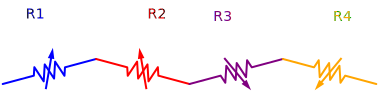

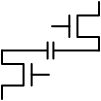

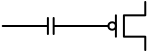

In [4]:
# Reverse and Flip, Colors
d = schemdraw.Drawing()
d.add(elm.ResistorVar().theta(15).color('blue').label('R1', ofst=1))
d.add(elm.ResistorVar().theta(-15).reverse().color('red').label('R2', ofst=1))
d.add(elm.ResistorVar().theta(15).flip().color('purple').label('R3', ofst=1))
d.add(elm.ResistorVar().theta(-15).flip().reverse().color('orange').label('R4', ofst=1))
display(d.draw())

# Reverse/flip 3-terminal
d = schemdraw.Drawing()
f = d.add(elm.NFet())
d.add(elm.Capacitor().at(f.drain))
d.add(elm.NFet().reverse().anchor('source'))
display(d.draw())

d = schemdraw.Drawing(inches_per_unit=.5)
d.add(elm.Capacitor())
d.add(elm.PFet().anchor('gate').reverse())
display(d.draw())

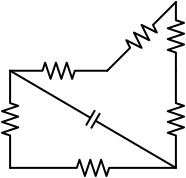

In [5]:
# to, tox, toy, endpoints
# Should be closed loop with cap along diagonal.
d = schemdraw.Drawing()
R1 = d.add(elm.Resistor())
R2 = d.add(elm.Resistor().theta(45))
R3 = d.add(elm.Resistor().down().toy(R1.end))
R4 = d.add(elm.Resistor().down())
R5 = d.add(elm.Resistor().left().tox(R1.start))
R6 = d.add(elm.Resistor().endpoints(R5.end, R1.start))
C = d.add(elm.Capacitor(to=R4.end))
d.draw()

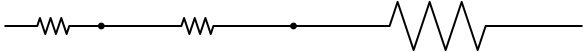

In [6]:
# length, xoom
d = schemdraw.Drawing()
d.add(elm.Resistor())
d.add(elm.Dot())
d.add(elm.Resistor().length(6))
d.add(elm.Dot())
d.add(elm.Resistor().scale(3))
d.draw()

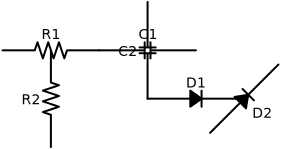

In [7]:
# Anchor Test
# R2 should start at the center of R1
# Capacitors have center at same point
# Tilted diode is centered on end of straight diode

d = schemdraw.Drawing(inches_per_unit=.5)
R1 = d.add(elm.Resistor().label('R1'))
R2 = d.add(elm.Resistor().down().at(R1.center).label('R2'))
C1 = d.add(elm.Capacitor().right().at(R1.end).label('C1'))
C2 = d.add(elm.Capacitor().down().at(C1.center).anchor('center').label('C2'))
D1 = d.add(elm.Diode().right().fill('black').label('D1'))
D2 = d.add(elm.Diode().theta(45).anchor('center').at(D1.end).label('D2', 'bot').fill('black'))
d.draw()

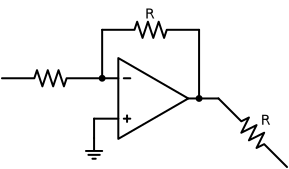

In [8]:
# Opamp, opamp anchor points
d = schemdraw.Drawing(inches_per_unit=.5)
op = d.add(elm.Opamp())
d.add(elm.Line().left().at(op.in1).length(d.unit/6))
d.add(elm.Dot())
d.add(elm.Line().up().length(d.unit/2))
Rf = d.add(elm.Resistor().right().length(d.unit*1).label('$R_f$'))

ee = d.add(elm.Line().down().toy(op.out))
ll = d.add(elm.Line().left().tox(op.out))
d.add(elm.Dot().at(ll.start))
out = d.add(elm.Line().right().length(d.unit/5))

Rf = d.add(elm.Resistor().theta(-45).label('$R_o$'))
Rin = d.add(elm.Resistor().left().at(Point(op.in1)-Point((d.unit/5,0))))
d.add(elm.Line().left().at(op.in2).length(d.unit/4))
d.add(elm.Line().down().length(d.unit/5))
d.add(elm.Ground())
d.draw()

In [9]:
# Drawing unit effects default length of Element2Terms.
d = schemdraw.Drawing(unit=2)
d.add(elm.Resistor())
d.add(elm.Capacitor())
display(d.draw())

d = schemdraw.Drawing(unit=4)
d.add(elm.Resistor())
d.add(elm.Capacitor())
display(d.draw())

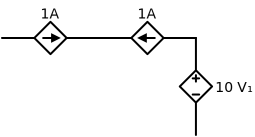

In [10]:
# Dependent sources
d = schemdraw.Drawing()
d.add(elm.SourceControlledV().label('10 $V_1$', 'bot'))
d.add(elm.SourceControlledI().left().label('1A', 'top'))
d.add(elm.SourceControlledI().left().reverse().label('1A', 'top'))
d.draw()


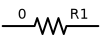

In [11]:
# Label location with offset
d = schemdraw.Drawing()
R = d.add(elm.Resistor()
          .label('R1', loc='center', ofst=(.9,.4))
          .label('0', loc='center', ofst=(-.9, .4)))
d.draw()

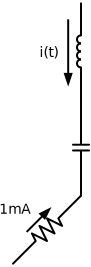

In [12]:
# Test current label arrows, reversing, length
# The 1mA current arrow should be same length as resistor, pointing up/right
# The i(t) arrow should point down (reverse of inductor 'up' direction)
d = schemdraw.Drawing()
R = d.add(elm.Resistor().theta(45))
d.add(elm.CurrentLabel(length=1).at(R.center).label('1mA'))
d.add(elm.Capacitor().up())
L = d.add(elm.Inductor())
d.add(elm.CurrentLabel().at(L.center).reverse().label('$i(t)$'))
d.draw()


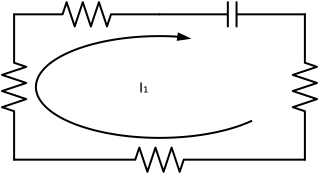

In [13]:
# Test loop current label
d = schemdraw.Drawing(inches_per_unit=.75)
R1 = d.add(elm.Resistor())
C = d.add(elm.Capacitor())
R2 = d.add(elm.Resistor().down())
R3 = d.add(elm.Resistor().left().tox(R1.start))
R4 = d.add(elm.Resistor().up())
d.add(elm.LoopCurrent([R1, R2, R3, R4], direction='cw', theta1=70, theta2=-20).label('$I_1$'))
d.draw()


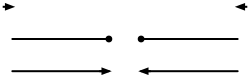

In [14]:
# Check reverse of Arrow and LineDot that have points referenced to start/end
schemdraw.Drawing(
    elm.Arrow(),
    elm.Arrow().at((4, 0)).reverse(),
    elm.LineDot().at((0, 1)),
    elm.LineDot().at((4, 1)).reverse(),
    elm.Arrowhead().at((0, 2)),
    elm.Arrowhead().at((7, 2)).reverse()
)

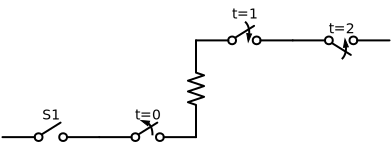

In [15]:
# Switches
d = schemdraw.Drawing()
d.add(elm.Switch().label('S1'))
d.add(elm.Switch(action='open').label('$t=0$'))
d.add(elm.Resistor().up())
d.add(elm.Switch(action='close').right().label('$t=1$'))
d.add(elm.Switch(action='close').right().flip().label('$t=2$'))
d.draw()

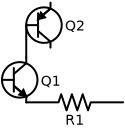

In [16]:
# BJT's
d = schemdraw.Drawing()
Q1 = d.add(elm.BjtNpn(circle=True).label('Q1'))
d.add(elm.Line().up().length(1))
Q2 = d.add(elm.BjtPnp(circle=True).right().label('Q2'))
d.add(elm.Resistor().at(Q1.emitter).label('R1', 'bot'))
d.draw()

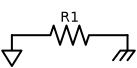

In [17]:
# Test grounds
d = schemdraw.Drawing(inches_per_unit=.6)
d.add(elm.GroundSignal())
d.add(elm.Resistor().label('R1'))
d.add(elm.GroundChassis())
d.draw()

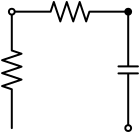

In [18]:
# Open and closed dots
d = schemdraw.Drawing(inches_per_unit=.6)
d.add(elm.Resistor().up())
d.add(elm.Dot(open=True))
d.add(elm.Resistor().right())
d.add(elm.Dot())
d.add(elm.Capacitor().down())
d.add(elm.Dot(open=True))
d.draw()

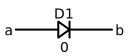

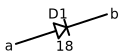

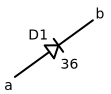

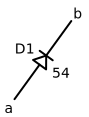

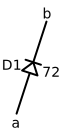

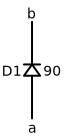

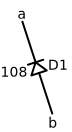

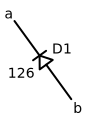

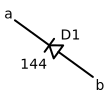

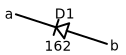

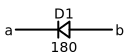

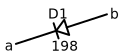

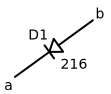

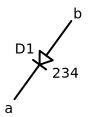

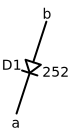

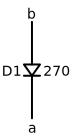

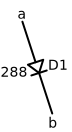

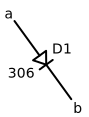

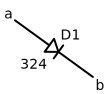

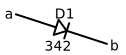

In [19]:
# Label offsets/rotations
div = 20
for i in range(div):
    th = (360./div) * i
    d = schemdraw.Drawing()
    R1 = d.add(elm.Diode().theta(th).label('D1') \
               .label('%.0f'%th, loc='bot') \
               .label('a', loc='lft') \
               .label('b', loc='rgt'))
    display(d.draw())
    

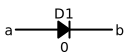

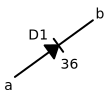

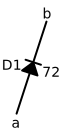

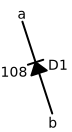

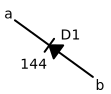

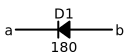

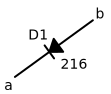

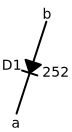

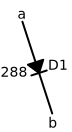

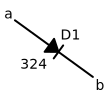

In [20]:
# Label offsets/rotations - with flip
div = 10
for i in range(div):
    th = (360./div) * i
    d = schemdraw.Drawing()
    R1 = d.add(elm.Diode().fill('black').theta(th).flip()
               .label('D1', 'top')
               .label('%.0f'%th, 'bot')
               .label('a', 'lft')
               .label('b', 'rgt'))
    display(d.draw())
    

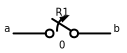

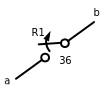

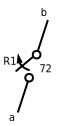

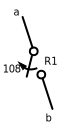

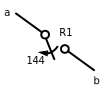

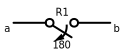

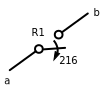

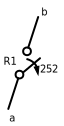

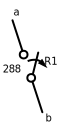

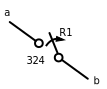

In [21]:
# Label offsets/rotations - with reverse
div = 10
for i in range(div):
    th = (360./div) * i
    d = schemdraw.Drawing(fontsize=10)
    R1 = d.add(elm.Switch(action='open').theta(th).reverse()
               .label('R1', 'top')
               .label(format(th, '.0f'), loc='bot')
               .label('a', 'lft')
               .label('b', 'rgt'))
    display(d.draw())
    

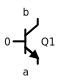

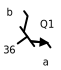

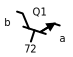

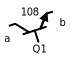

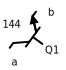

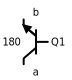

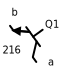

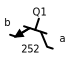

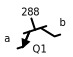

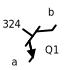

In [22]:
# Label offsets/rotations - BJT
div = 10
for i in range(div):
    th = (360./div) * i
    d = schemdraw.Drawing(fontsize=10)
    R1 = d.add(elm.BjtNpn().theta(th)
               .label('Q1', 'rgt')
               .label(format(th, '.0f'), 'lft')
               .label('a', 'bot')
               .label('b', 'top'))
    display(d.draw())
    

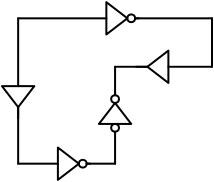

In [23]:
# Test lead extension of single input/output logic gates
d = schemdraw.Drawing()
n = d.add(l.Not())
d.add(l.NotNot().up())
d.add(l.Buf().right().reverse())
d.add(l.Line().up().length(d.unit/2))
d.add(l.Not().left().tox(n.start).reverse())
d.add(l.Buf().down().toy(n.start))
d.draw()

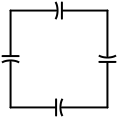

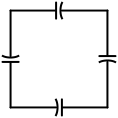

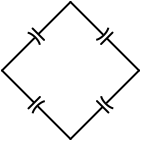

In [24]:
# Check arc drawing that broke with matplotlib 2.2
d = schemdraw.Drawing()
d.add(elm.Capacitor2())
d.add(elm.Capacitor2().up())
d.add(elm.Capacitor2().left())
d.add(elm.Capacitor2().down())
display(d.draw())

d = schemdraw.Drawing()
d.add(elm.Capacitor2().reverse())
d.add(elm.Capacitor2().up().reverse())
d.add(elm.Capacitor2().left().reverse())
d.add(elm.Capacitor2().down().reverse())
display(d.draw())

d = schemdraw.Drawing()
d.add(elm.Capacitor2().theta(45))
d.add(elm.Capacitor2().theta(135))
d.add(elm.Capacitor2().theta(225))
d.add(elm.Capacitor2().theta(-45))
display(d.draw())

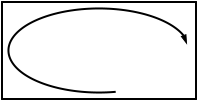

In [25]:
# Make sure arrow head is in correct place
d = schemdraw.Drawing()
L1 = d.add(elm.Line().length(d.unit*2))
L2 = d.add(elm.Line().down())
L3 = d.add(elm.Line().left().tox(L1.start))
L4 = d.add(elm.Line().up())
d.add(elm.LoopCurrent([L1, L2, L3, L4], direction='cw', theta1=10, theta2=292))
d.draw()

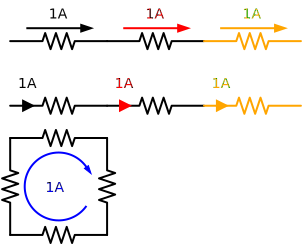

In [26]:
d = schemdraw.Drawing()
R = d.add(elm.Resistor())
d.add(elm.CurrentLabel().at(R).label('1A'))
R = d.add(elm.Resistor())
d.add(elm.CurrentLabel().at(R).label('1A').color('red'))  # Independent color
R = d.add(elm.Resistor(color='orange'))
d.add(elm.CurrentLabel().at(R).label('1A'))  # Inherit color from element

R = d.add(elm.Resistor().at((0,-2)))
d.add(elm.CurrentLabelInline().at(R).label('1A'))
R = d.add(elm.Resistor())
d.add(elm.CurrentLabelInline().at(R).label('1A').color('red'))
R = d.add(elm.Resistor(color='orange'))
d.add(elm.CurrentLabelInline().at(R).label('1A'))

R1 = d.add(elm.Resistor().at((0, -3)))
R2 = d.add(elm.Resistor().down())
R3 = d.add(elm.Resistor().left())
R4 = d.add(elm.Resistor().up())
LL = d.add(elm.LoopCurrent((R1, R2, R3, R4)).label('1A').color('blue'))
LL.segments[1].color='green'   # Can still change color of individual segments
d.draw()

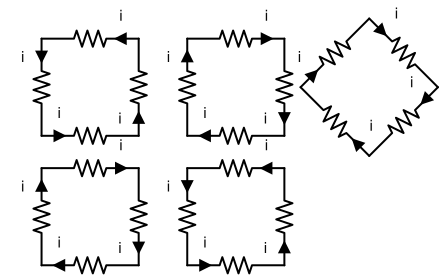

In [27]:
# Inline current arrows
d = schemdraw.Drawing()
R1 = d.add(elm.Resistor().left())
d.add(elm.CurrentLabelInline().at(R1.center).label('$i_{R1}$'))  # Needs same direction as R1
R2 = d.add(elm.Resistor().down())
d.add(elm.CurrentLabelInline().at(R2.center).label('$i_{R2}$'))
R3 = d.add(elm.Resistor().right())
d.add(elm.CurrentLabelInline().at(R3.center).label('$i_{R3}$'))
R4 = d.add(elm.Resistor().up())
d.add(elm.CurrentLabelInline().at(R4.center).label('$i_{R4}$'))

R5 = d.add(elm.Resistor().left().at([0, -4]))
d.add(elm.CurrentLabelInline(direction='out').at(R5.center).label('$i_{R5}$'))
R6 = d.add(elm.Resistor().down())
d.add(elm.CurrentLabelInline(direction='out').at(R6.center).label('$i_{R6}$'))
R7 = d.add(elm.Resistor().right())
d.add(elm.CurrentLabelInline(direction='out').at(R7.center).label('$i_{R7}$'))
R8 = d.add(elm.Resistor().up())
d.add(elm.CurrentLabelInline(direction='out').at(R8.center).label('$i_{R8}$'))

R9 = d.add(elm.Resistor().left().at([4.5, 0]))
d.add(elm.CurrentLabelInline(direction='out').at(R9.center).label('$i_{R9}$'))
R10 = d.add(elm.Resistor().down())
d.add(elm.CurrentLabelInline(direction='out').at(R10.center).label('$i_{R10}$'))
R11 = d.add(elm.Resistor().right())
d.add(elm.CurrentLabelInline(direction='out').at(R11.center).label('$i_{R11}$'))
R12 = d.add(elm.Resistor().up())
d.add(elm.CurrentLabelInline(direction='out').at(R12.center).label('$i_{R12}$'))

R13 = d.add(elm.Resistor().left().at([4.5, -4]))
d.add(elm.CurrentLabelInline(direction='in').at(R13.center).label('$i_{R13}$'))
R14 = d.add(elm.Resistor().down())
d.add(elm.CurrentLabelInline(direction='in').at(R14.center).label('$i_{R14}$'))
R15 = d.add(elm.Resistor().right())
d.add(elm.CurrentLabelInline(direction='in').at(R15.center).label('$i_{R15}$'))
R16 = d.add(elm.Resistor().up())
d.add(elm.CurrentLabelInline(direction='in').at(R16.center).label('$i_{R16}$'))

R17 = d.add(elm.Resistor().theta(45).at([5, -1.5]))
d.add(elm.CurrentLabelInline(direction='in').at(R17.center).label('$i_{R17}$'))
R18 = d.add(elm.Resistor().theta(-45))
d.add(elm.CurrentLabelInline(direction='in').at(R18.center).label('$i_{R18}$'))
R19 = d.add(elm.Resistor().theta(-135))
d.add(elm.CurrentLabelInline(direction='in').at(R19.center).label('$i_{R19}$'))
R20 = d.add(elm.Resistor().theta(-225))
d.add(elm.CurrentLabelInline(direction='in').at(R20.center).label('$i_{R20}$'))
d.draw()


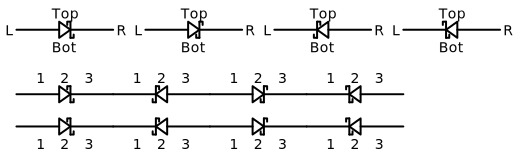

In [28]:
# Check that labels are drawn on the correct side
# with correct alignment
d = schemdraw.Drawing()
d.add(elm.Schottky().label('Top').label('Bot', 'bot').label('L', 'lft').label('R', 'rgt'))
d.add(elm.Schottky().at([4,0]).flip().label('Top').label('Bot', 'bot').label('L', 'lft').label('R', 'rgt'))
d.add(elm.Schottky().at([8,0]).reverse().label('Top').label('Bot', 'bot').label('L', 'lft').label('R', 'rgt'))
d.add(elm.Schottky().at([12,0]).flip().reverse().label('Top').label('Bot', 'bot').label('L', 'lft').label('R', 'rgt'))
d.here = [0, -2]
d.add(elm.Schottky().label(['1', '2', '3']))
d.add(elm.Schottky().reverse().label(['1', '2', '3']))
d.add(elm.Schottky().flip().label(['1', '2', '3']))
d.add(elm.Schottky().flip().reverse().label(['1', '2', '3']))
d.here = [0, -3]
d.add(elm.Schottky().label(['1', '2', '3'], 'bot'))
d.add(elm.Schottky().reverse().label(['1', '2', '3'], 'bot'))
d.add(elm.Schottky().flip().label(['1', '2', '3'], 'bot'))
d.add(elm.Schottky().flip().reverse().label(['1', '2', '3'], 'bot'))
d.draw()

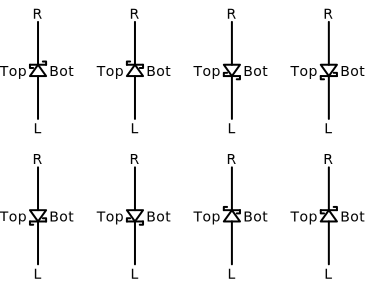

In [29]:
d = schemdraw.Drawing()
d.add(elm.Schottky().up().label('Top').label('Bot', 'bot').label('L', 'lft').label('R', 'rgt'))
d.add(elm.Schottky().up().at([3,0]).flip().label('Top').label('Bot', 'bot').label('L', 'lft').label('R', 'rgt'))
d.add(elm.Schottky().up().at([6,0]).reverse().label('Top').label('Bot', 'bot').label('L', 'lft').label('R', 'rgt'))
d.add(elm.Schottky().up().at([9,0]).flip().reverse().label('Top').label('Bot', 'bot').label('L', 'lft').label('R', 'rgt'))

d.add(elm.Schottky().down().at([0,-1.5]).label('Top').label('Bot', 'bot').label('L', 'lft').label('R', 'rgt'))
d.add(elm.Schottky().down().at([3,-1.5]).flip().label('Top').label('Bot', 'bot').label('L', 'lft').label('R', 'rgt'))
d.add(elm.Schottky().down().at([6,-1.5]).reverse().label('Top').label('Bot', 'bot').label('L', 'lft').label('R', 'rgt'))
d.add(elm.Schottky().down().at([9,-1.5]).flip().reverse().label('Top').label('Bot', 'bot').label('L', 'lft').label('R', 'rgt'))
d.draw()

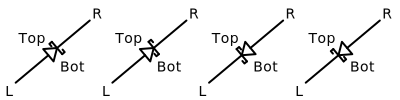

In [30]:
d = schemdraw.Drawing()
d.add(elm.Schottky().theta(40).label('Top').label('Bot', 'bot').label('L', 'lft').label('R', 'rgt'))
d.add(elm.Schottky().theta(40).at([3,0]).flip().label('Top').label('Bot', 'bot').label('L', 'lft').label('R', 'rgt'))
d.add(elm.Schottky().theta(40).at([6,0]).reverse().label('Top').label('Bot', 'bot').label('L', 'lft').label('R', 'rgt'))
d.add(elm.Schottky().theta(40).at([9,0]).flip().reverse().label('Top').label('Bot', 'bot').label('L', 'lft').label('R', 'rgt'))
d.draw()

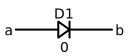

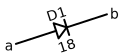

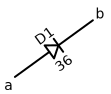

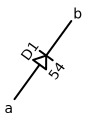

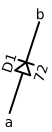

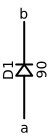

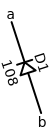

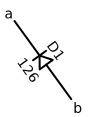

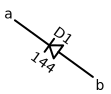

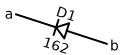

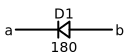

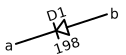

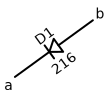

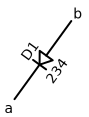

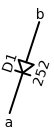

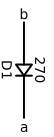

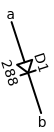

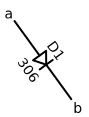

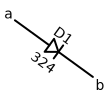

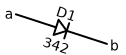

In [31]:
# Label text rotated with the element - text should never go "upside down"
div = 20
for i in range(div):
    th = (360./div) * i
    d = schemdraw.Drawing()
    R1 = d.add(elm.Diode().theta(th)
               .label('D1', rotate=True)
               .label('%.0f'%th, loc='bot', rotate=th)
               .label('a', 'lft')
               .label('b', 'rgt'))
    display(d.draw())
    